# SuperStore

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data
df = pd.read_csv('Superstore.csv', encoding='latin1')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#### Load the dataset and check for missing/null values.

In [4]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Show the total sales and profit.

In [6]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
print(f"Total Sales: {total_sales:.2f}")
print(f"Total Profit: {total_profit:.2f}")

Total Sales: 2297200.86
Total Profit: 286397.02


#### Find the top 10 customers by total sales.

In [7]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_customers)

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


### Which category has the highest sales?

In [10]:
Highest_sales_category = df.groupby('Category')['Sales'].sum().idxmax()
print(f"Category with highest sales: {Highest_sales_category}")

Category with highest sales: Technology


#### Show the number of unique states and cities in the dataset.

In [11]:
num_unique_states = df['State'].nunique()
num_unique_cities = df['City'].nunique()
print(f"Number of unique states: {num_unique_states}")
print(f"Number of unique cities: {num_unique_cities}")

Number of unique states: 49
Number of unique cities: 531


#### Plot the monthly sales trend (line chart).

C:\Users\mks46\AppData\Local\Temp\ipykernel_19120\1708753443.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


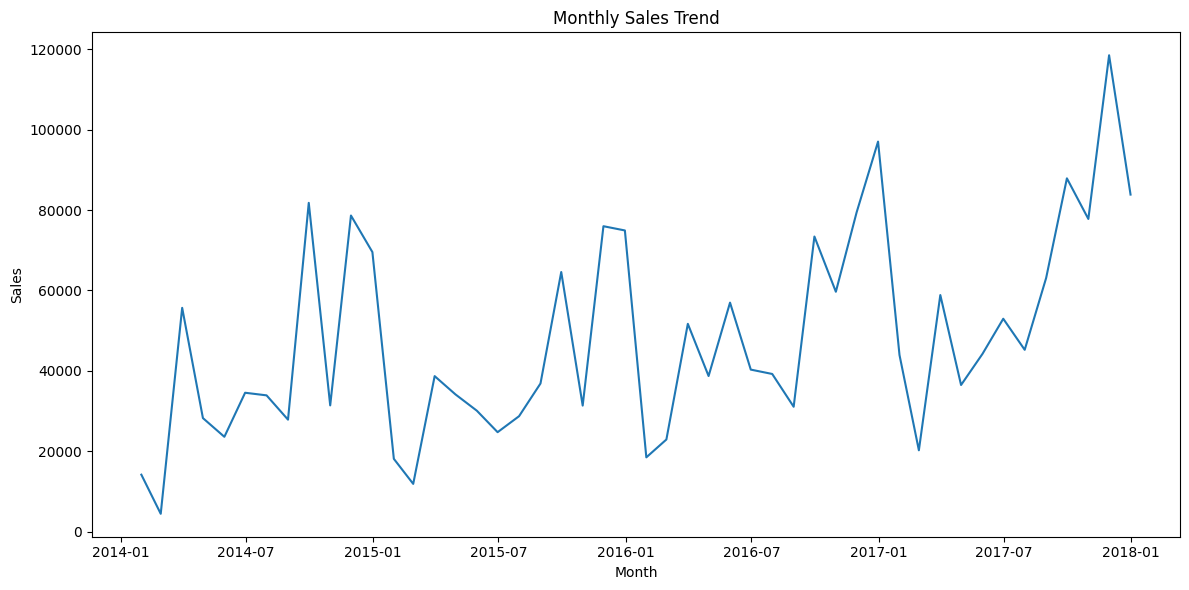

In [12]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by month and sum sales
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

# Plot the monthly sales trend
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

#### Which sub-category is the most profitable?

In [13]:
most_profitable_subcategory = df.groupby('Sub-Category')['Profit'].sum().idxmax()
print(f"Most profitable sub-category: {most_profitable_subcategory}")

Most profitable sub-category: Copiers


#### Find the average order value (AOV) = Total Sales / Number of Orders.

In [14]:
# Calculate the number of orders
num_orders = df['Order ID'].nunique()

# Calculate Average Order Value (AOV)
average_order_value = total_sales / num_orders
print(f"Average Order Value (AOV): {average_order_value:.2f}")

Average Order Value (AOV): 458.61


#### Show the distribution of sales and profit using histograms.

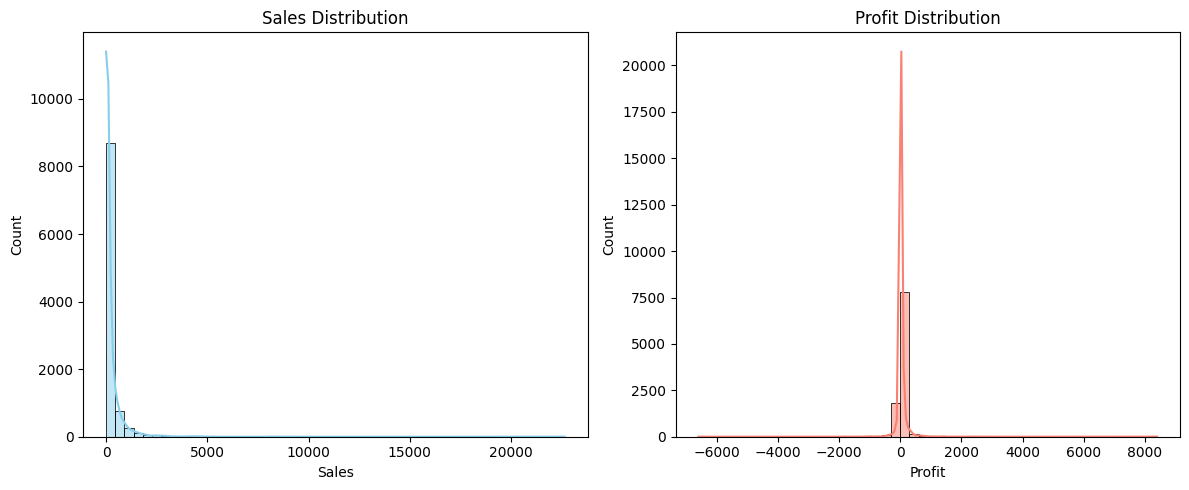

In [15]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['Sales'], bins=50, kde=True, color='skyblue')
plt.title('Sales Distribution')
plt.xlabel('Sales')

plt.subplot(1,2,2)
sns.histplot(df['Profit'], bins=50, kde=True, color='salmon')
plt.title('Profit Distribution')
plt.xlabel('Profit')

plt.tight_layout()
plt.show()

#### Which state generated the highest revenue?

In [16]:
highest_revenue_state = df.groupby('State')['Sales'].sum().idxmax()
print(f"State with highest revenue: {highest_revenue_state}")

State with highest revenue: California


#### Perform an RFM analysis (Recency, Frequency, Monetary) for customers.

In [17]:
# RFM Analysis for customers

# Recency: Days since last purchase
latest_date = df['Order Date'].max()
recency = df.groupby('Customer ID')['Order Date'].max().apply(lambda x: (latest_date - x).days)

# Frequency: Number of orders
frequency = df.groupby('Customer ID')['Order ID'].nunique()

# Monetary: Total sales amount
monetary = df.groupby('Customer ID')['Sales'].sum()

# Combine into a DataFrame
rfm = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,184,5,5563.560
AA-10375,19,9,1056.390
AA-10480,259,4,1790.512
AA-10645,55,6,5086.935
AB-10015,415,3,886.156


#### Find the year-over-year sales growth by category.

In [18]:
# Extract year from 'Order Date'
df['Year'] = df['Order Date'].dt.year

# Group by year and category, sum sales
category_year_sales = df.groupby(['Year', 'Category'])['Sales'].sum().unstack()

# Calculate year-over-year growth (%)
category_year_growth = category_year_sales.pct_change().multiply(100).round(2)

print("Year-over-year sales growth by category (%):")
print(category_year_growth)

Year-over-year sales growth by category (%):
Category  Furniture  Office Supplies  Technology
Year                                            
2014            NaN              NaN         NaN
2015           8.48            -9.58       -7.13
2016          16.65            34.03       39.06
2017           8.29            33.79       20.04


#### Use a heatmap to analyze the correlation between Sales, Quantity, Discount, and Profit.

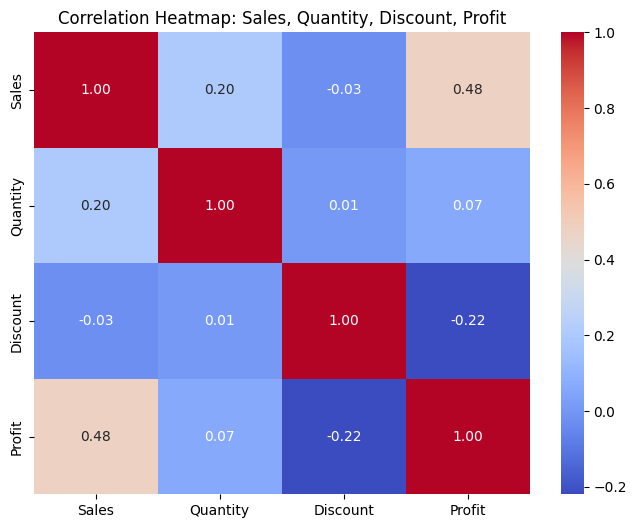

In [19]:
# Compute the correlation matrix for selected columns
corr_matrix = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Sales, Quantity, Discount, Profit')
plt.show()

#### Identify loss-making orders (where profit < 0).

In [20]:
# Filter loss-making orders where profit is less than 0
loss_making_orders = df[df['Profit'] < 0]

# Display the first few loss-making orders
loss_making_orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
14,15,US-2015-118983,2015-11-22,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580,2015
15,16,US-2015-118983,2015-11-22,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160,2015
23,24,US-2017-156909,2017-07-16,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196,2017
27,28,US-2015-150630,2015-09-17,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,2015


#### Build a Pareto Analysis (80/20 rule): which customers contribute to 80% of the sales?

In [21]:
# Pareto Analysis: Identify customers contributing to 80% of total sales

# Sort customers by total sales in descending order
customer_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

# Calculate cumulative sales percentage
cumulative_sales_pct = customer_sales.cumsum() / customer_sales.sum()

# Find customers contributing to 80% of sales
pareto_customers = cumulative_sales_pct[cumulative_sales_pct <= 0.8].index

print(f"Number of customers contributing to 80% of sales: {len(pareto_customers)}")
print("Top customers (80/20 rule):")
print(pareto_customers)

Number of customers contributing to 80% of sales: 395
Top customers (80/20 rule):
Index(['Sean Miller', 'Tamara Chand', 'Raymond Buch', 'Tom Ashbrook',
       'Adrian Barton', 'Ken Lonsdale', 'Sanjit Chand', 'Hunter Lopez',
       'Sanjit Engle', 'Christopher Conant',
       ...
       'Dean Braden', 'Chris McAfee', 'Michael Kennedy', 'Lena Hernandez',
       'Kristina Nunn', 'Jamie Frazer', 'Fred Harton', 'Craig Carreira',
       'Bobby Elias', 'Kalyca Meade'],
      dtype='object', name='Customer Name', length=395)
